In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('../../files-dataframes/dados_energia_simulados_ptbr.csv')
df.head()

,Ano,Continente,País,Setor,Consumo_Energia_Renovável (MWh),Consumo_Energia_Fóssil (MWh),Emissões_CO2 (toneladas),PIB (milhões de USD),População (milhões)
0,2016,Oceania,China,Comercial,7397.685031,12535.546950,78910.224574,2.463037e+06,165.908531
1,2020,América do Sul,Brasil,Transporte,971.598203,10036.494790,93896.756176,6.152132e+06,19.864661
2,2003,América do Sul,China,Indústria,5455.079849,6789.106081,22068.881619,2.228470e+06,184.533453
3,2019,América do Sul,China,Indústria,2778.436239,12941.548015,49534.631946,6.481451e+06,134.801730
4,2019,América do Sul,Rússia,Residencial,6429.091172,11755.142517,117101.029860,3.262370e+06,76.268548


## Crie um Boxplot que compare o consumo de energias renováveis e fósseis por continente.

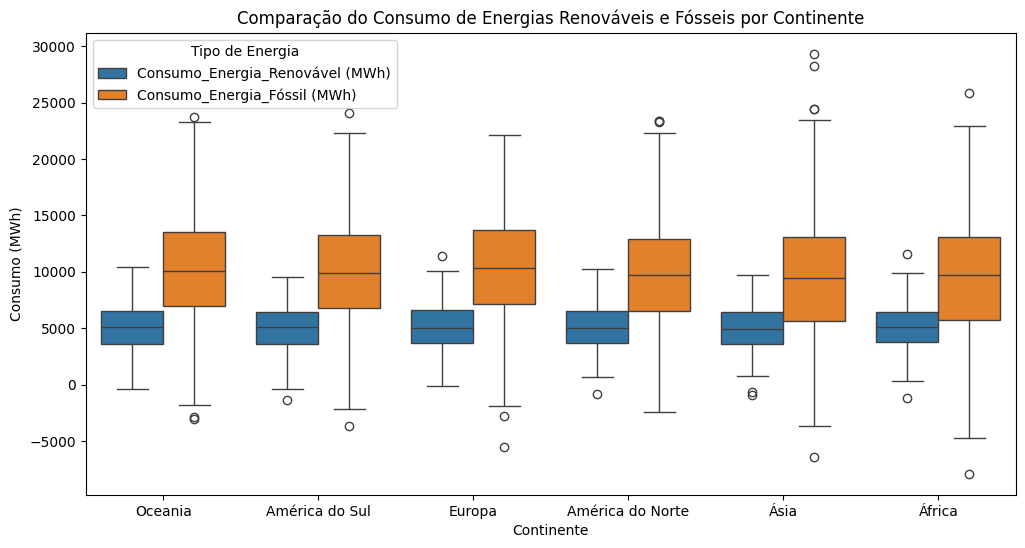

In [4]:
df_melt = pd.melt(df, id_vars=['Continente'], value_vars=['Consumo_Energia_Renovável (MWh)', 'Consumo_Energia_Fóssil (MWh)'],
                  var_name='Tipo de Energia', value_name='Consumo (MWh)')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Continente', y='Consumo (MWh)', hue='Tipo de Energia', data=df_melt)

plt.title('Comparação do Consumo de Energias Renováveis e Fósseis por Continente')
plt.xlabel('Continente')
plt.ylabel('Consumo (MWh)')

plt.legend(title='Tipo de Energia')
plt.show()

## Use gráficos de linha para mostrar a evolução do consumo de energias renováveis e fósseis e as emissões de CO2 ao longo do tempo

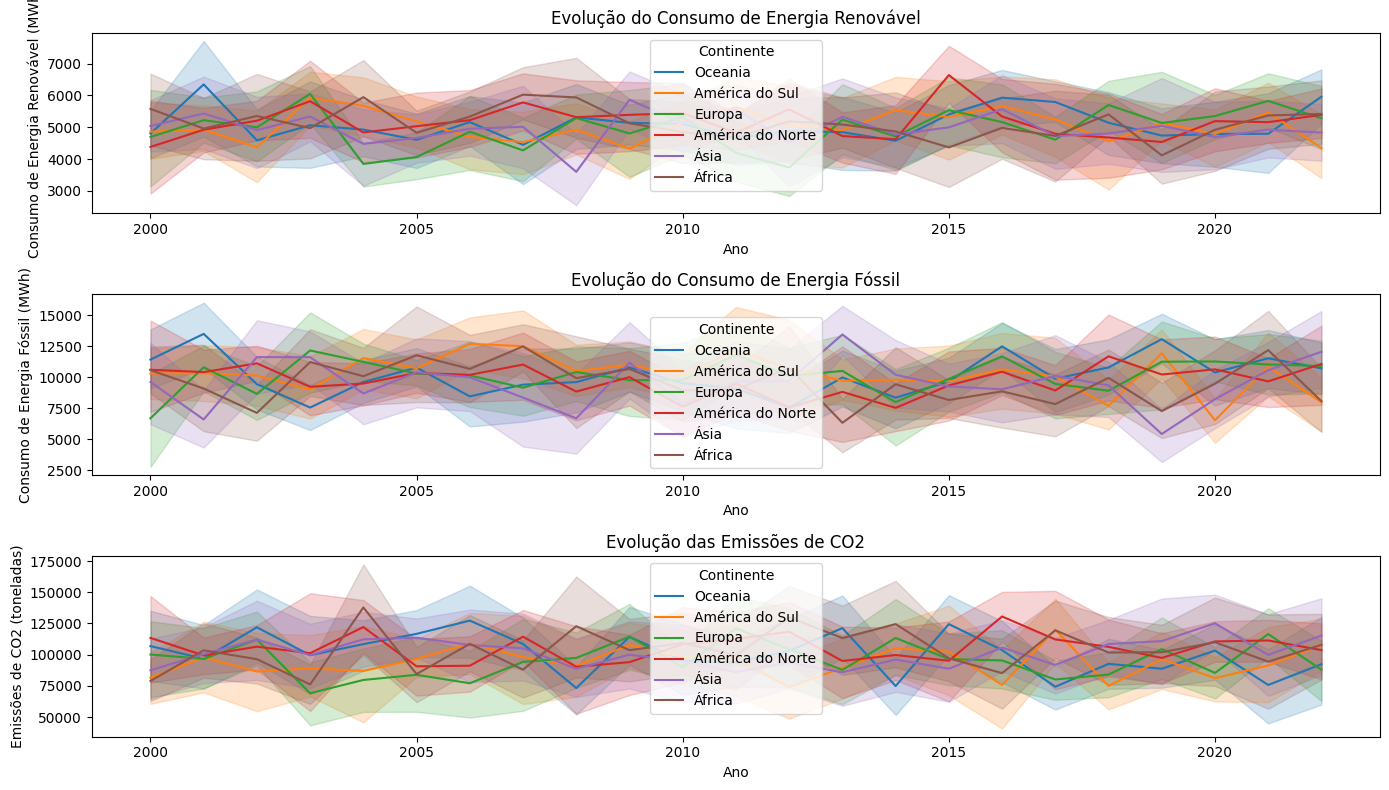

In [5]:
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
sns.lineplot(data=df, x='Ano', y='Consumo_Energia_Renovável (MWh)', hue='Continente')
plt.title('Evolução do Consumo de Energia Renovável')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia Renovável (MWh)')

plt.subplot(3, 1, 2)
sns.lineplot(data=df, x='Ano', y='Consumo_Energia_Fóssil (MWh)', hue='Continente')
plt.title('Evolução do Consumo de Energia Fóssil')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia Fóssil (MWh)')

plt.subplot(3, 1, 3)
sns.lineplot(data=df, x='Ano', y='Emissões_CO2 (toneladas)', hue='Continente')
plt.title('Evolução das Emissões de CO2')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (toneladas)')

plt.tight_layout()
plt.show()

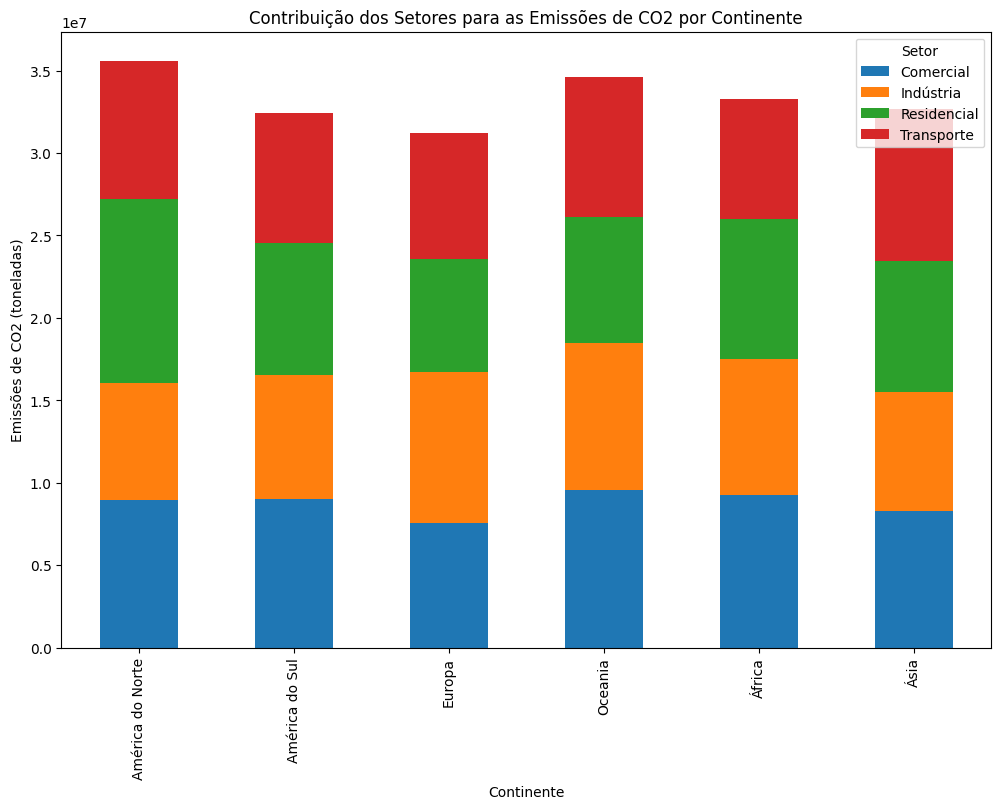

In [6]:
df_aggregated = df.groupby(['Continente', 'Setor']).sum().reset_index()

df_pivot = df_aggregated.pivot(index='Continente', columns='Setor', values='Emissões_CO2 (toneladas)')

df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Contribuição dos Setores para as Emissões de CO2 por Continente')
plt.xlabel('Continente')
plt.ylabel('Emissões de CO2 (toneladas)')
plt.legend(title='Setor')

plt.show()

## Crie gráficos de dispersão para analisar a correlação entre o consumo de energia fóssil e as emissões de CO2 por continente, incluindo uma linha de regressão.

<Figure size 1400x1000 with 0 Axes>

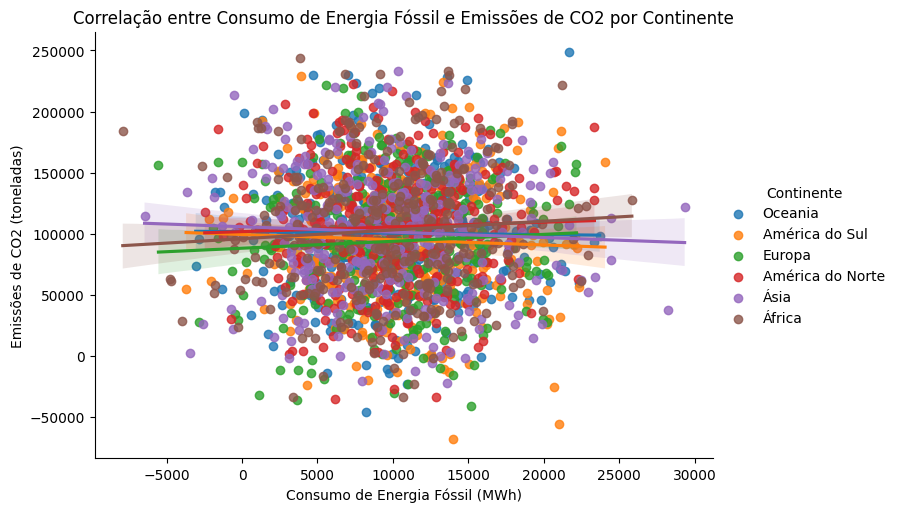

In [7]:
plt.figure(figsize=(14, 10))

sns.lmplot(data=df, x='Consumo_Energia_Fóssil (MWh)', y='Emissões_CO2 (toneladas)', hue='Continente', markers='o', aspect=1.5)

plt.title('Correlação entre Consumo de Energia Fóssil e Emissões de CO2 por Continente')
plt.xlabel('Consumo de Energia Fóssil (MWh)')
plt.ylabel('Emissões de CO2 (toneladas)')

plt.show()

## Crie gráficos interativos que permitam visualizar como o consumo energético impacta as emissões ao longo do tempo em diferentes regiões.

In [8]:
fig1 = px.line(df, x='Ano', y='Consumo_Energia_Renovável (MWh)', color='Continente', 
               title='Consumo de Energia Renovável ao Longo do Tempo',
               labels={'Consumo_Energia_Renovável (MWh)': 'Consumo de Energia Renovável (MWh)', 'Ano': 'Ano'})

fig2 = px.line(df, x='Ano', y='Consumo_Energia_Fóssil (MWh)', color='Continente', 
               title='Consumo de Energia Fóssil ao Longo do Tempo',
               labels={'Consumo_Energia_Fóssil (MWh)': 'Consumo de Energia Fóssil (MWh)', 'Ano': 'Ano'})

fig3 = px.line(df, x='Ano', y='Emissões_CO2 (toneladas)', color='Continente', 
               title='Emissões de CO2 ao Longo do Tempo',
               labels={'Emissões_CO2 (toneladas)': 'Emissões de CO2 (toneladas)', 'Ano': 'Ano'})

fig1.show()
fig2.show()
fig3.show()

## Explique como o consumo de energia está relacionado às emissões de CO2, destacando diferenças regionais e setoriais.


##### R:  O consumo de energia, especialmente de fontes fósseis, está diretamente relacionado às emissões de CO2, com diferenças significativas entre regiões e setores devido a fatores como infraestrutura, desenvolvimento econômico e políticas ambientais.